### Pandas: From messy to tidy datasets

The Pandas library for Python was build around the dataframe idea taken from R, the statistical programming language. Wes McKinney is the driving force behind the library (O'Reilly book: Python for Data Analysis).

Hadley Wickham is his R counterpart working on RStudio, the free programming environment for R, and author of some important R libraries.

Hardly any flame wars between the R and Python communities. McKinney and Wickham sometimes work together closely, the fruits of which find their way into both languages. R is real strong in hard core statistical libraries and has a kind of functional twist to it and, at least for me, a bit of a quirky syntax; Python is the more broad programming language with strong support, through its libraries, for scientific programming.

Both languages have "notebooks", and it is possible in the Jupyter ([JU]lia[PYT]hone[R]) noteboooks to incorporate both Python and R snippets. CSV files are the "lingua franca" between the languages.

In 2014 Hadley Wickham wrote an important article in the Journal of Statistical Software: "Tidy Data".

In it he argued for a certain way of structuring data in order to make it more easy and effective to clean and work with the data: Using consistent data structures and matching tools.

A tidy structure has the following attributes:

  - Each variable forms a column and contains values
  - Each observation forms a row
  - Each observational unit forms a table
  
  where:
  
  - variable is a measurement or an attribute (height, weight, sex, etc.)
  - value is the actual measurement or attribute (152 cm, 80 kg, female, etc.)
  - observation: all values measure on the same unit
  
A dataset that is not tidy is messy.

Why are there messy datasets? Well, life is messy in a way. Often datasets get messy because they are used for presentation purposes and values of variables tend to creep into column headers. Or, in order to facilitate the input of data, one stores multiple variables into one column. Or, someone is being creative and bends the rules a bit in order to get things done (the restaurant dataset where rootbeer was accounted for as "cola w/cheese", simply because rootbeer was not available as a choice).

In order to get some working experience with Pandas we will start to struggle a bit with messy datasets and tidy them up. Later on we will  focus more on analyzing datasets.

To get a firmer grasp on the problem, let's look a a very simple, but slightly messy dataset.

First we open the file in an editor to have a look at it. A quick repair is to name the missing header.

Then we use Pandas to read in the csv file:

In [1]:
import pandas as pd

df = pd.read_csv("./data/treatment.csv", sep=";")
df

,Unnamed: 0,Treatment A,Treatment B
0,John Smith,-,2
1,Jane Doe,16,11
2,Mary Johnson,3,1


The first column containing name values is not named (has no header); the other two column headers contain values. The 5 or 6 values (depending on how we count the "-") in the cells are not given a proper variable name (header), they are just framed by the other values. This lay-out is perfectly ok for presentation purposes, but in order to process the data, we need a clear cut difference between variables and values.

We added the column name for the first column and saved the file as "treatment1.csv".

In [2]:
df = pd.read_csv("./data/treatment1.csv", sep=";")

melted_df = pd.melt(df,
                   ["Name"],
                   var_name = "Treatment",
                   value_name = "Result")
melted_df

,Name,Treatment,Result
0,John Smith,Treatment A,-
1,Jane Doe,Treatment A,16
2,Mary Johnson,Treatment A,3
3,John Smith,Treatment B,2
4,Jane Doe,Treatment B,11
5,Mary Johnson,Treatment B,1


#### Column headers are values, not variable names

In [3]:
from os import listdir
from os.path import isfile, join
import glob

df = pd.read_csv("./data/pew-raw.csv")
df

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In [4]:
formatted_df = pd.melt(df,
                      ["religion"],
                      var_name = "income",
                      value_name = "freq")
formatted_df = formatted_df.sort_values(by = ["religion"])
formatted_df.head(10)

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


In [5]:
df_songs = pd.read_csv("./data/billboard.csv", encoding = "mac_latin2")
df_songs.head(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The file above has two big drawbacks: Again values in the column headers (x1st.week, etc.) and when a song is in the Top 100 for less then 75 weeks, the remaining columns are filled with missing values (NaN).

Now that we know the problems, let's make a plan to fix them:

- we will store the week numbers as values in a single column (melt them into a date column)
- we will create one row per week for each record (if there is no data for the given week, we will NOT create a row)

In [6]:
# Note that the first 7 columns of the dataframe are ok
# We will store their names in a list
id_vars = ["year",
          "artist.inverted",
          "track",
          "time",
          "genre",
          "date.entered",
          "date.peaked"]

# Now we can start to melt the weeks into a week variable and the ranking number into rank value
# All the heavylifting is done by the melt fuction of Pandas
df = pd.melt(frame=df_songs,
            id_vars = id_vars,
            var_name = "week",
            value_name = "rank")
# Quick look to see what we did
df.head(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,x1st.week,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,x1st.week,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,x1st.week,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x1st.week,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x1st.week,81.0


In [7]:
# The values in the week column can be polished a bit
# We just need the number between "x"[Int]"st.week"
# And while we are at it: We can do without the float in the rank column
# Formatting to the rescue
import re
df['week'] = df['week'].str.extract('(\d+)',expand = False).astype(int)
df.head(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1,59.0
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1,83.0
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,1,63.0
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1,77.0
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81.0


Ah, bummer; a whopping error. We forgot that our rank column, after the melting, contains all these NaN values and Python complained that it did not know how to convert "NaN" into an integer.

In [8]:
# Let's check
print(df['rank'])

0        78.0
1        15.0
2        71.0
3        41.0
4        57.0
5        59.0
6        83.0
7        63.0
8        77.0
9        81.0
10       82.0
11       71.0
12       70.0
13       84.0
14       59.0
15       60.0
16       82.0
17       81.0
18       72.0
19       99.0
20       63.0
21       77.0
22       51.0
23       74.0
24       81.0
25       74.0
26       50.0
27       81.0
28       94.0
29       92.0
         ... 
24062     NaN
24063     NaN
24064     NaN
24065     NaN
24066     NaN
24067     NaN
24068     NaN
24069     NaN
24070     NaN
24071     NaN
24072     NaN
24073     NaN
24074     NaN
24075     NaN
24076     NaN
24077     NaN
24078     NaN
24079     NaN
24080     NaN
24081     NaN
24082     NaN
24083     NaN
24084     NaN
24085     NaN
24086     NaN
24087     NaN
24088     NaN
24089     NaN
24090     NaN
24091     NaN
Name: rank, dtype: float64


"Away with the thing!" We use the dropna() function on our dataframe.

In [9]:
df = df.dropna()
df['rank'] = df['rank'].astype(int)
df.head(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1,59
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1,83
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,1,63
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1,77
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81


Now we need to add values for the new date column
We have date.entered values and we have an integer for week
With these two values we can compute the values for our new date column
With the help of Pandas using the Python datetime library, we:
- convert date.entered
- convert the week value
- add the two up
- subtract the offset

In [10]:
import datetime
pd.to_datetime("2009-09-23")
#pd.to_timedelta(1, unit='w')
#pd.to_datetime("2009-09-23") + pd.to_timedelta(1, unit='w')
#pd.DateOffset(weeks=1)
#pd.to_datetime("2009-09-23") + pd.to_timedelta(2, unit='w') - pd.DateOffset(weeks=1)

Timestamp('2009-09-23 00:00:00')

In [11]:
# In order to populate the new date column, we just have to add the new column
df['date'] = pd.to_datetime(df['date.entered']) + pd.to_timedelta(df['week'], unit='w') - pd.DateOffset(weeks=1)

In [12]:
df.head(10)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57,2000-08-05
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,1,59,2000-06-17
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,1,83,1999-12-25
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,1,63,2000-04-01
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,1,77,2000-06-24
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81,1999-06-05


In order to get a better overview of the rise and fall of records in the chart, we need to sort the dataframe
We construct a new dataframe using a nested list of lists; leaving out date.entered

In [13]:
df = df[["year",
        "artist.inverted",
        "track",
        "time",
        "genre",
        "week",
        "rank",
        "date"]]
df = df.sort_values(ascending = True, by = ["year", "artist.inverted", "track", "week", "rank"])
df.head(20)

,year,artist.inverted,track,time,genre,week,rank,date
246,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,1,87,2000-02-26
563,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,2,82,2000-03-04
880,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,3,72,2000-03-11
1197,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,4,77,2000-03-18
1514,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,5,87,2000-03-25
1831,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,6,94,2000-04-01
2148,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,7,99,2000-04-08
287,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,1,91,2000-09-02
604,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,2,87,2000-09-09
921,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,3,92,2000-09-16


We have come a long way, but our dataframe is still messy in the sense that in one dataframe or table we combine two observational units: song and rank. Two observational units should be presented in two tables.

In [14]:
# First we store our dataframe in a new variable: billboard
billboard = df

In [15]:
# We then create a songs table that contains the details of each song
# First we define the columns for that table:
songs_cols = ["year",
             "artist.inverted",
             "track",
             "time",
             "genre"]
songs = billboard[songs_cols].drop_duplicates()
songs = songs.reset_index(drop = True)
songs["song_id"] = songs.index
songs.head(10)

,year,artist.inverted,track,time,genre,song_id
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,Rap,0
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,R&B,1
2,2000,3 Doors Down,Kryptonite,3:53,Rock,2
3,2000,3 Doors Down,Loser,4:24,Rock,3
4,2000,504 Boyz,Wobble Wobble,3:35,Rap,4
5,2000,98°,Give Me Just One Night (Una Noche),3:24,Rock,5
6,2000,A*Teens,Dancing Queen,3:44,Pop,6
7,2000,Aaliyah,I Don't Wanna,4:15,Rock,7
8,2000,Aaliyah,Try Again,4:03,Rock,8
9,2000,"Adams, Yolanda",Open My Heart,5:30,Gospel,9


In [16]:
# Now we create a rank table that just contains the newly generated song_id together with date and rank
ranks = pd.merge(billboard, songs, on = ["year", "artist.inverted", "track", "time", "genre"])
ranks = ranks[["song_id", "date", "rank"]]
ranks.head(10)

,song_id,date,rank
0,0,2000-02-26,87
1,0,2000-03-04,82
2,0,2000-03-11,72
3,0,2000-03-18,77
4,0,2000-03-25,87
5,0,2000-04-01,94
6,0,2000-04-08,99
7,1,2000-09-02,91
8,1,2000-09-09,87
9,1,2000-09-16,92


#### Multiple variables stored in one column

We use part of a dataset from the WHO that documents the count of confirmed tuberculosis cases by country, year, age and sex: tb-raw.csv.

Let's have a quick look at the dataset to see what we have got.

In [17]:
df = pd.read_csv("./data/tb-raw.csv")
df

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


We immediately see some problems with this dataset:

  - some columns contain multiple values (sex and age): m014 (male, 0-14)
  - a mixture of zeros (0) and missing values (NaN)

The first round of tidying: We need to melt the sex + age group columns into a single one, after that we derive three columns from it: sex, age_lower, and age_upper.

In [18]:
df = pd.melt(df, id_vars=["country","year"], value_name="cases", var_name="sex_and_age")
df.head()

,country,year,sex_and_age,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


So far, so good. Now we need to extract the three items of information from our new sex_and_age column. That is we want to store m014 separate columns for sex (i.e. "m"), age lower bound ("0") and age upper bound ("14").

We do this by defining a temporary dataframe, that we fill with just the sex_and_age column. Then we will use a regular expression to split "m014" into the 3 items we need.

In [19]:
tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})", expand=False)
tmp_df

,0,1,2
0,m,0,14
1,m,0,14
2,m,0,14
3,m,0,14
4,m,0,14
5,m,0,14
6,m,0,14
7,m,0,14
8,m,0,14
9,m,0,14


In [20]:
# We add names to the columns we just created
tmp_df.columns = ["sex", "age_lower", "age_upper"]
tmp_df.head()

,sex,age_lower,age_upper
0,m,0,14
1,m,0,14
2,m,0,14
3,m,0,14
4,m,0,14


We could leave it like this, but to keep a little bit closer to the original dataset, we are going to merge the "age_lower" and "age_upper" columns into one "age" column (still in our temporary dataframe).

In [21]:
tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]
tmp_df.head()

,sex,age_lower,age_upper,age
0,m,0,14,0-14
1,m,0,14,0-14
2,m,0,14,0-14
3,m,0,14,0-14
4,m,0,14,0-14


Right, nearly there. We merge the two dataframes into one with the pandas "concat" method:

In [22]:
df = pd.concat([df, tmp_df], axis = 1)
df.head()

,country,year,sex_and_age,cases,sex,age_lower,age_upper,age
0,AD,2000,m014,0.0,m,0,14,0-14
1,AE,2000,m014,2.0,m,0,14,0-14
2,AF,2000,m014,52.0,m,0,14,0-14
3,AG,2000,m014,0.0,m,0,14,0-14
4,AL,2000,m014,2.0,m,0,14,0-14


In [23]:
# We can now drop unnecessary columns and rows
# We do not need sex_and_age, age_lower and age_upper any more, so we simply "drop" them
df = df.drop(['sex_and_age', 'age_lower', 'age_upper'], axis = 1)
df

,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
1,AE,2000,2.0,m,0-14
2,AF,2000,52.0,m,0-14
3,AG,2000,0.0,m,0-14
4,AL,2000,2.0,m,0-14
5,AM,2000,2.0,m,0-14
6,AN,2000,0.0,m,0-14
7,AO,2000,186.0,m,0-14
8,AR,2000,97.0,m,0-14
9,AS,2000,NaN,m,0-14


In [24]:
# Last bits of tidying
# We remove the missing values
df = df.dropna()
df

,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
1,AE,2000,2.0,m,0-14
2,AF,2000,52.0,m,0-14
3,AG,2000,0.0,m,0-14
4,AL,2000,2.0,m,0-14
5,AM,2000,2.0,m,0-14
6,AN,2000,0.0,m,0-14
7,AO,2000,186.0,m,0-14
8,AR,2000,97.0,m,0-14
10,AD,2000,0.0,m,15-24


In [25]:
# Then we sort the remaining rows
df = df.sort(ascending = True, columns = ['country', 'year', 'sex', 'age'])
# df = df.sort_values(by = ['country', 'year', 'sex', 'age'], ascending = True)
df.head(15)

/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
10,AD,2000,0.0,m,15-24
20,AD,2000,1.0,m,25-34
30,AD,2000,0.0,m,35-44
40,AD,2000,0.0,m,45-54
50,AD,2000,0.0,m,55-64
81,AE,2000,3.0,f,0-14
1,AE,2000,2.0,m,0-14
11,AE,2000,4.0,m,15-24
21,AE,2000,4.0,m,25-34


As usual, we scratched the surface here of what you can do with Pandas. We concentrated on tidying data, because that is what you will have almost always to do in order to get anywhere. Luckily, Pandas comes with excellent [documentation](http://pandas.pydata.org/pandas-docs/stable/).

We think the combination of Pandas with Jupyter noteboooks is a powerful one. Especially, if we look at the possibilities to visualize the data contained in the dataframes.

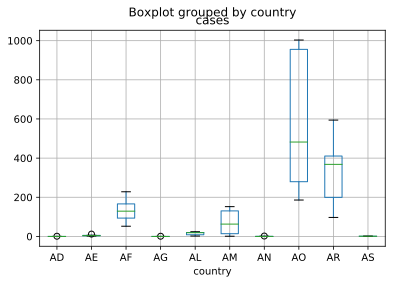

In [27]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
df.boxplot(column = 'cases', by = 'country')